### importing needed libraries and packages 

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings ("ignore")
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Data Preparation

In [2]:
# Load dataset
credit_app_data = pd.read_csv('crx.data', header = None)



In [3]:
# Inspect data
credit_app_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
#setting columns for my dataset 

credit_app_data.columns=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel','Ethnicity', 'YearsEmployed','PriorDefault', 'Employed', 'CreditScore', 'DrivingLicence', 'Citizen', 'ZipCode', 'Income' ,'ApprovalStatus']
credit_app_data

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DrivingLicence,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


# Exploratory Data Analysis (EDA)

In [5]:
#shape of dataset
credit_app_data.shape

(690, 16)

In [6]:
#DataFrame information
credit_app_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DrivingLicence  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [7]:
# inspecting the first 20 elemenents
credit_app_data.head(20)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DrivingLicence,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [8]:
#inspecting the last 20 elements
credit_app_data.tail(20)


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DrivingLicence,Citizen,ZipCode,Income,ApprovalStatus
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


##### Inspect missing values in the dataset

In [9]:
credit_app_data.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DrivingLicence    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64


#### Actually there is no nan in my dataset, but there is a special character which is not in Attribute Information, so it has be replaced by nan in order to deal with it

In [10]:
credit_app_data = credit_app_data.replace('?', np.nan)
 

In [11]:
credit_app_data.isna().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DrivingLicence     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

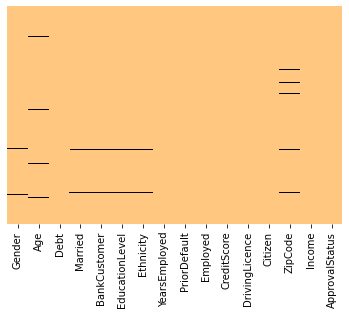

In [12]:
sns.heatmap(credit_app_data.isnull(),yticklabels=False,cbar=False,cmap='copper_r')
plt.show()

### describing my dataset

In [13]:
credit_app_data.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


### correlation matrix

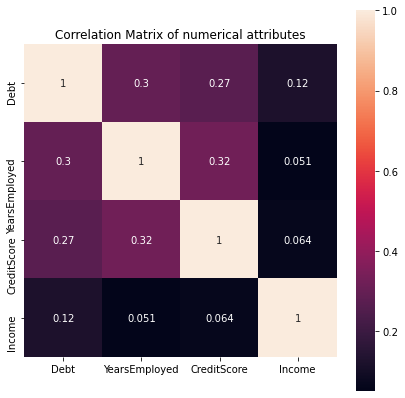

In [14]:
correlation = credit_app_data.corr()
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Correlation Matrix of numerical attributes')
sns.heatmap(correlation,square=True,annot=True,)
plt.show()



### Approved and non approved people

Number of approved people: 307
Number of non approved people: 383
Approved probalibility: 0.4449275362318841


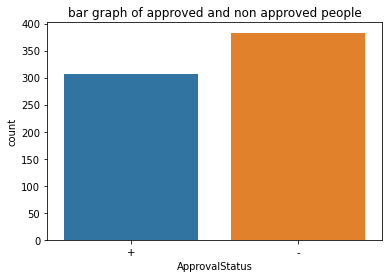

In [15]:
positive=[]
not_positive=[]
for i in credit_app_data.ApprovalStatus:
    if i=='+':
        positive.append(i)
    else:
        not_positive.append(i)
print(f'Number of approved people: {len(positive)}')
print(f'Number of non approved people: {len(not_positive)}')
print(f'Approved probalibility: {len(positive)/len(credit_app_data.ApprovalStatus)}')
        
sns.countplot(data = credit_app_data, x = 'ApprovalStatus')
plt.title('bar graph of approved and non approved people')
plt.show()


### visualisation of distribution of data in numerical features


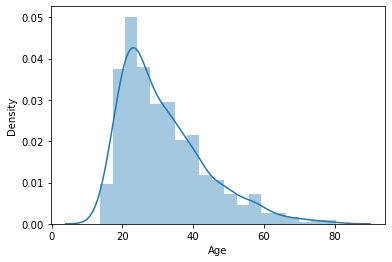

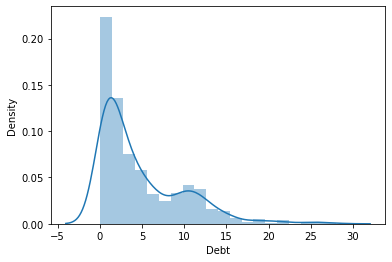

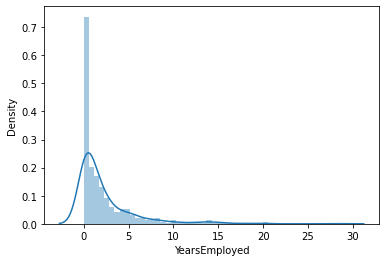

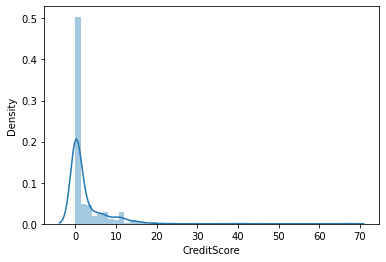

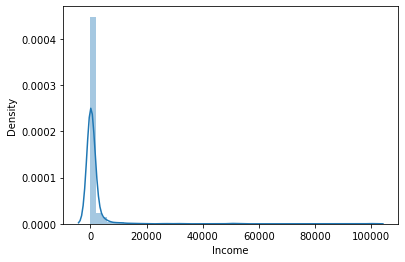

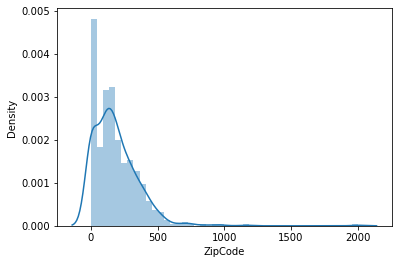

In [16]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(credit_app_data['Age'])
plotDistPlot(credit_app_data['Debt'])
plotDistPlot(credit_app_data['YearsEmployed'])
plotDistPlot(credit_app_data['CreditScore'])
plotDistPlot(credit_app_data['Income'])
plotDistPlot(credit_app_data['ZipCode'])

### pairplot of  non_categorical features

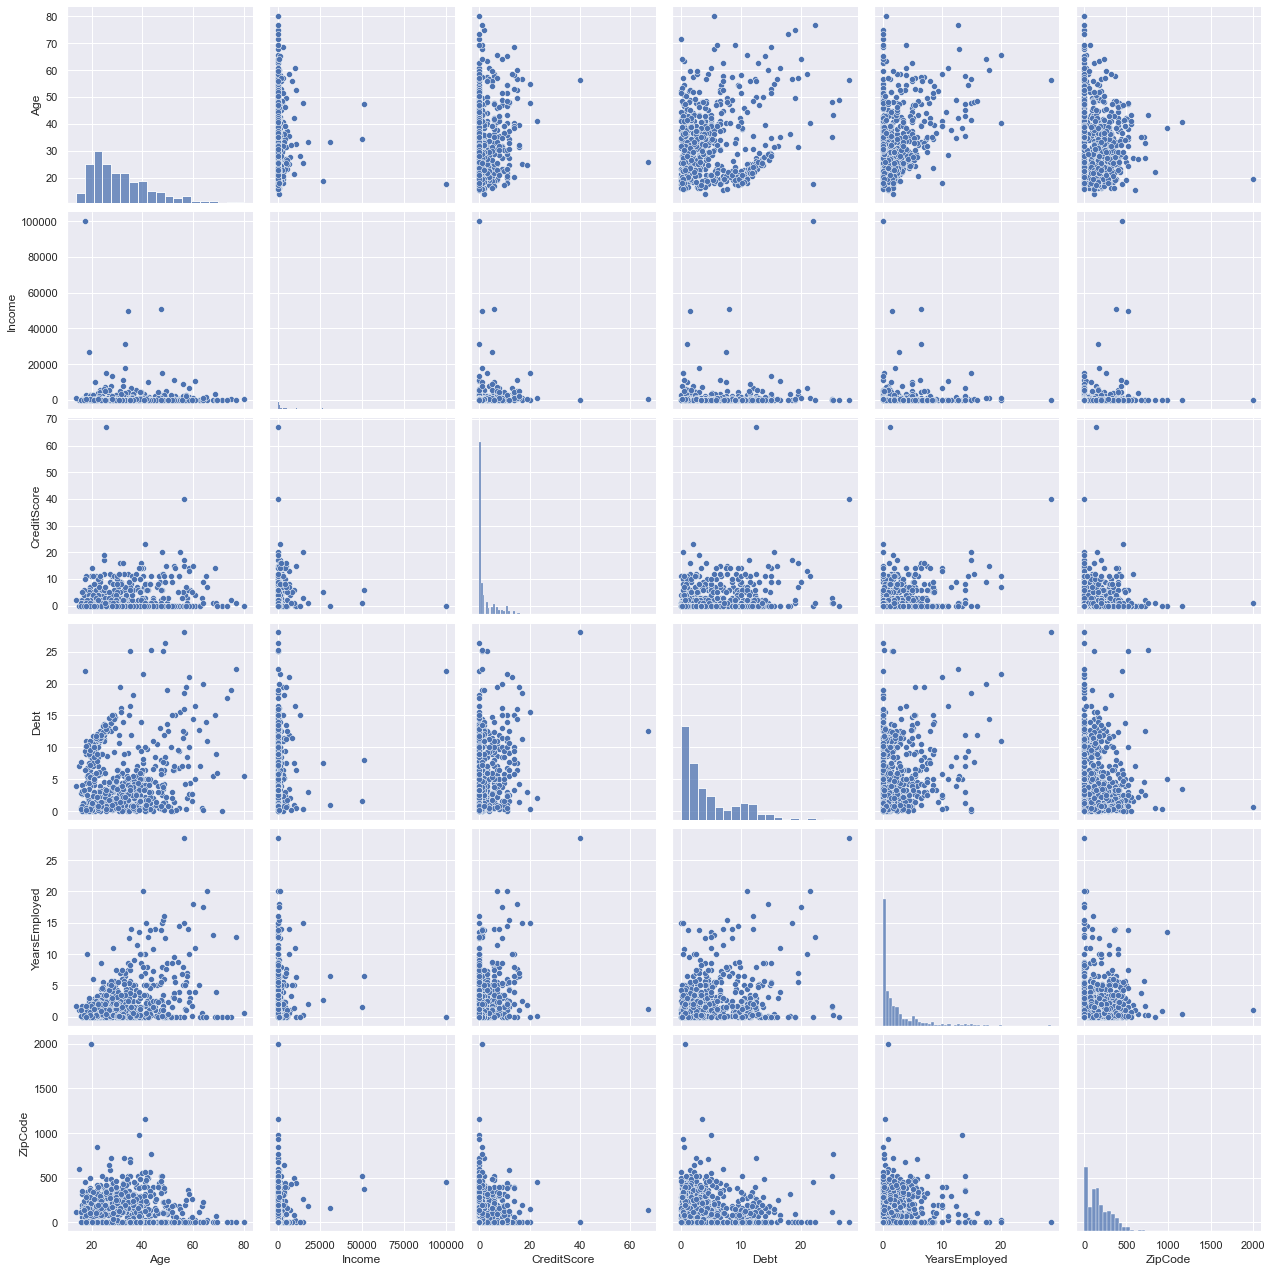

In [17]:
credit_app_data[['Age','ZipCode']]=credit_app_data[['Age','ZipCode']].astype(float)
sns.set()
cols = ['Age', 'Income', 'CreditScore', 'Debt', 'YearsEmployed','ZipCode']
sns.pairplot(credit_app_data[cols], size = 3, palette='bright')
plt.show()

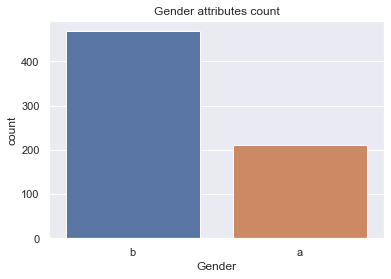

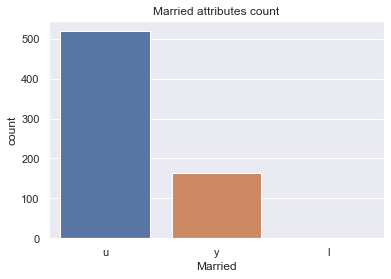

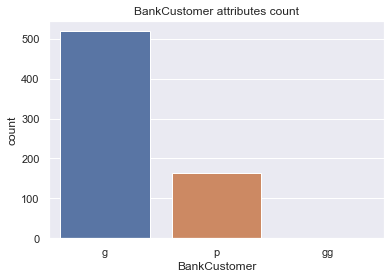

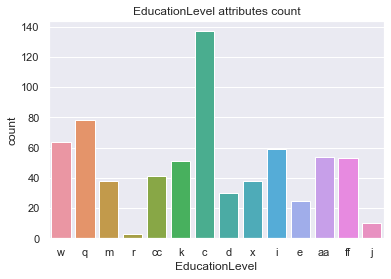

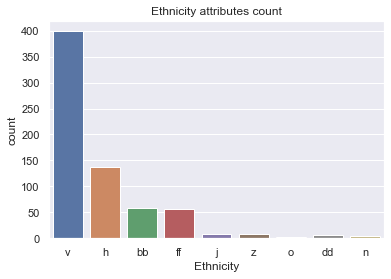

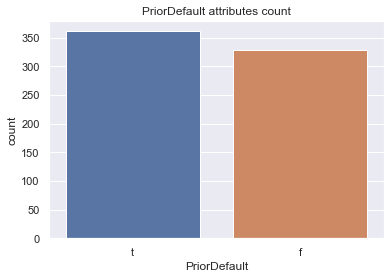

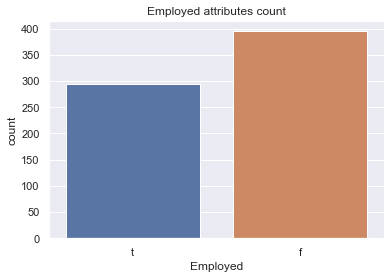

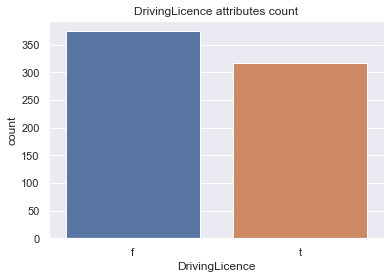

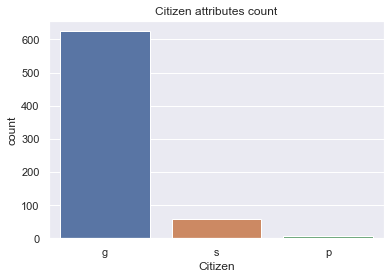

In [18]:

sns.countplot(data = credit_app_data, x = 'Gender')
plt.title('Gender attributes count')
plt.show()

sns.countplot(data = credit_app_data, x = 'Married')
plt.title('Married attributes count')
plt.show()

sns.countplot(data = credit_app_data, x = 'BankCustomer')
plt.title('BankCustomer attributes count')
plt.show()

sns.countplot(data = credit_app_data, x = 'EducationLevel')
plt.title('EducationLevel attributes count')
plt.show()

sns.countplot(data = credit_app_data, x = 'Ethnicity')
plt.title('Ethnicity attributes count')
plt.show()

sns.countplot(data = credit_app_data, x = 'PriorDefault')
plt.title('PriorDefault attributes count')
plt.show()

sns.countplot(data = credit_app_data, x = 'Employed')
plt.title('Employed attributes count')
plt.show()

sns.countplot(data = credit_app_data, x = 'DrivingLicence')
plt.title('DrivingLicence attributes count')
plt.show()

sns.countplot(data = credit_app_data, x = 'Citizen')
plt.title('Citizen attributes count')
plt.show()

#     plt.show()
# credit_app_data.select_dtypes(include=['object']).columns

### checking for outliers

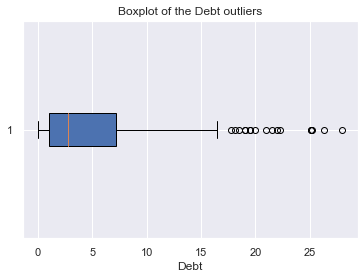

In [19]:
plt.boxplot(credit_app_data.Debt, vert=False,patch_artist=True,)
plt.title("Boxplot of the Debt outliers")
plt.xlabel("Debt")
plt.show()

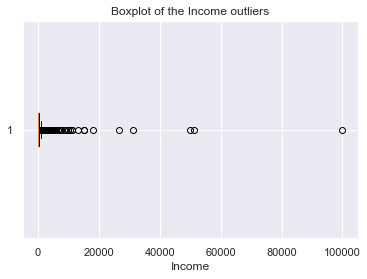

In [20]:
plt.boxplot(credit_app_data.Income, vert=False,patch_artist=True)
plt.title("Boxplot of the Income outliers")
plt.xlabel("Income")
plt.show()

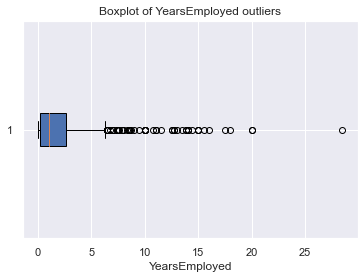

In [21]:
plt.boxplot(credit_app_data.YearsEmployed, vert=False,patch_artist=True)
plt.title("Boxplot of YearsEmployed outliers")
plt.xlabel("YearsEmployed")
plt.show()

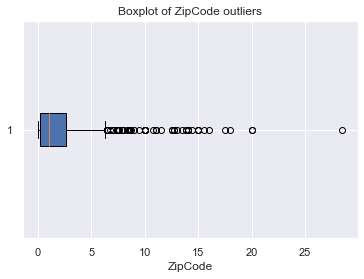

In [22]:
plt.boxplot(credit_app_data.YearsEmployed, vert=False,patch_artist=True)
plt.title("Boxplot of ZipCode outliers")
plt.xlabel("ZipCode")
plt.show()

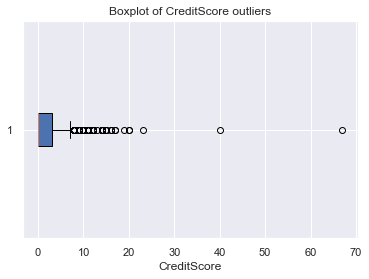

In [23]:
plt.boxplot(credit_app_data.CreditScore, vert=False,patch_artist=True)
plt.title("Boxplot of CreditScore outliers")
plt.xlabel("CreditScore")
plt.show()

# Preprocessing, Feature Selection and Engineering

### filling Nan Values of mean for non_categorical feastures

In [24]:
#Impute the missing values in numerical columns with mean imputation
credit_app_data.fillna(credit_app_data.mean(), inplace=True)

credit_app_data.isna().sum()


Gender            12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DrivingLicence     0
Citizen            0
ZipCode            0
Income             0
ApprovalStatus     0
dtype: int64

### replacing the Nan values in categorical columns with mode

In [25]:
#Impute the missing values in categorical columns with mean imputation
credit_app_data.fillna(credit_app_data.select_dtypes(include='object').mode().iloc[0], inplace=True)
credit_app_data.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DrivingLicence    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

### minimizing the outliez by Zscore

In [26]:
z_s = stats.zscore(credit_app_data[['Age','Debt','YearsEmployed','CreditScore','ZipCode','Income']])
basolute=np.abs(z_s)
minimized_outliers= (basolute < 3).all(axis=1)
credit_app_data = credit_app_data[minimized_outliers]
credit_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          638 non-null    object 
 1   Age             638 non-null    float64
 2   Debt            638 non-null    float64
 3   Married         638 non-null    object 
 4   BankCustomer    638 non-null    object 
 5   EducationLevel  638 non-null    object 
 6   Ethnicity       638 non-null    object 
 7   YearsEmployed   638 non-null    float64
 8   PriorDefault    638 non-null    object 
 9   Employed        638 non-null    object 
 10  CreditScore     638 non-null    int64  
 11  DrivingLicence  638 non-null    object 
 12  Citizen         638 non-null    object 
 13  ZipCode         638 non-null    float64
 14  Income          638 non-null    int64  
 15  ApprovalStatus  638 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 84.7+ KB


### Droping unimportant features

In [27]:
'''Columns 14 has to be droped because it contains sum meaningless values such as 00000, 00028,
which seeem to be meaningless to my model, therefore it has to be droped '''
credit_app_data.drop(['ZipCode'],axis=1,inplace=True)
credit_app_data

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DrivingLicence,Citizen,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,750,-


#### standarlizing non categorical parameter 

In [28]:
scaler=MinMaxScaler()
credit_app_data[['Age','Debt','Income','YearsEmployed','CreditScore']]=scaler.fit_transform(credit_app_data[['Age','Debt','Income','YearsEmployed','CreditScore']])
credit_app_data

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DrivingLicence,Citizen,Income,ApprovalStatus
0,b,0.332166,0.000000,u,g,w,v,0.108696,t,t,0.0625,f,g,0.000000,+
1,a,0.873590,0.228718,u,g,q,h,0.264348,t,t,0.3750,f,g,0.037066,+
2,a,0.209063,0.025641,u,g,q,h,0.130435,t,f,0.0000,f,g,0.054541,+
3,b,0.273823,0.078974,u,g,w,v,0.326087,t,t,0.3125,t,g,0.000199,+
4,b,0.124854,0.288462,u,g,w,v,0.148696,t,f,0.0000,f,s,0.000000,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,0.142552,0.517179,y,p,e,h,0.108696,f,f,0.0000,f,g,0.000000,-
686,a,0.173473,0.038462,u,g,c,v,0.173913,f,t,0.1250,t,g,0.026079,-
687,a,0.223648,0.692308,y,p,ff,ff,0.173913,f,t,0.0625,t,g,0.000066,-
688,b,0.081097,0.010513,u,g,aa,v,0.003478,f,f,0.0000,f,g,0.049643,-


### Categorical features Attribute Information

In [29]:
for i in  credit_app_data.select_dtypes(include=['object']).columns:
    print(f'{i}:{credit_app_data[i].unique()}')


Gender:['b' 'a']
Married:['u' 'y' 'l']
BankCustomer:['g' 'p' 'gg']
EducationLevel:['w' 'q' 'm' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' 'r']
Ethnicity:['v' 'h' 'bb' 'ff' 'j' 'o' 'dd' 'n' 'z']
PriorDefault:['t' 'f']
Employed:['t' 'f']
DrivingLicence:['f' 't']
Citizen:['g' 's' 'p']
ApprovalStatus:['+' '-']


### Encording Categorical column using pd.get.dumies()

In [30]:
encoded_data = pd.get_dummies(credit_app_data, columns = ['Gender', 'Married','BankCustomer', 'EducationLevel','Ethnicity', 'PriorDefault','DrivingLicence','Employed','Citizen'])


In [31]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 689
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                638 non-null    float64
 1   Debt               638 non-null    float64
 2   YearsEmployed      638 non-null    float64
 3   CreditScore        638 non-null    float64
 4   Income             638 non-null    float64
 5   ApprovalStatus     638 non-null    object 
 6   Gender_a           638 non-null    uint8  
 7   Gender_b           638 non-null    uint8  
 8   Married_l          638 non-null    uint8  
 9   Married_u          638 non-null    uint8  
 10  Married_y          638 non-null    uint8  
 11  BankCustomer_g     638 non-null    uint8  
 12  BankCustomer_gg    638 non-null    uint8  
 13  BankCustomer_p     638 non-null    uint8  
 14  EducationLevel_aa  638 non-null    uint8  
 15  EducationLevel_c   638 non-null    uint8  
 16  EducationLevel_cc  638 non

### maping + and - in dependent feature into 1 and 0

In [32]:
'''
dependent column ApprovalStatus has not been considered in one hot encorder 
because it could split my dependent column into two columns which could affect the model
'''
encoded_data['ApprovalStatus']=encoded_data['ApprovalStatus'].map({'+':1,'-':0})
encoded_data

,Age,Debt,YearsEmployed,CreditScore,Income,ApprovalStatus,Gender_a,Gender_b,Married_l,Married_u,...,Ethnicity_z,PriorDefault_f,PriorDefault_t,DrivingLicence_f,DrivingLicence_t,Employed_f,Employed_t,Citizen_g,Citizen_p,Citizen_s
0,0.332166,0.000000,0.108696,0.0625,0.000000,1,0,1,0,1,...,0,0,1,1,0,0,1,1,0,0
1,0.873590,0.228718,0.264348,0.3750,0.037066,1,1,0,0,1,...,0,0,1,1,0,0,1,1,0,0
2,0.209063,0.025641,0.130435,0.0000,0.054541,1,1,0,0,1,...,0,0,1,1,0,1,0,1,0,0
3,0.273823,0.078974,0.326087,0.3125,0.000199,1,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
4,0.124854,0.288462,0.148696,0.0000,0.000000,1,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.142552,0.517179,0.108696,0.0000,0.000000,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
686,0.173473,0.038462,0.173913,0.1250,0.026079,0,1,0,0,1,...,0,1,0,0,1,0,1,1,0,0
687,0.223648,0.692308,0.173913,0.0625,0.000066,0,1,0,0,0,...,0,1,0,0,1,0,1,1,0,0
688,0.081097,0.010513,0.003478,0.0000,0.049643,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0


### dependent and independent feautures

In [33]:
y=encoded_data['ApprovalStatus']
X=encoded_data.drop('ApprovalStatus',axis=1)

# model creation with default parameters

In [34]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,100,100))

mlp_model.fit(X,y)

y_predict = mlp_model.predict(X)



### Model performance

In [35]:
kf = KFold(n_splits=10, random_state=0, shuffle=True)

mlp_f1_Score  = cross_val_score(mlp_model, X, y, scoring="f1_weighted", cv = kf).mean()
mlp_precision = cross_val_score(mlp_model, X, y, scoring="precision", cv = kf).mean()
mlp_accuracy = cross_val_score(mlp_model, X, y, scoring="accuracy", cv = kf).mean()

print(f"Precision:{mlp_precision:.3f}\nf1_Score:{mlp_f1_Score:.3f}\nAccuracy:{mlp_f1_Score:.3f}")


Precision:0.793
f1_Score:0.823
Accuracy:0.823


### hyper_parameter turning && Grid_search

In [36]:
mlp_model = MLPClassifier()
parameters = {'hidden_layer_sizes':[(5,5,5),(10,10,10),(10,20,30),(30,30,30),(50,50,50)],\
              'max_iter':[1,20,40],'activation':['identity','logistic','tanh','relu'],\
              'learning_rate':['constant','invscaling','adaptive'],'solver':['lbfgs','sdg','adam'],'alpha':[0.0001,0.001,0.0002]}

In [37]:
search_mlp_model = GridSearchCV(mlp_model,param_grid=parameters, scoring='accuracy',cv=10)
search_mlp_model.fit(X,y)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.0002],
                         'hidden_layer_sizes': [(5, 5, 5), (10, 10, 10),
                                                (10, 20, 30), (30, 30, 30),
                                                (50, 50, 50)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [1, 20, 40],
                         'solver': ['lbfgs', 'sdg', 'adam']},
             scoring='accuracy')

### best feautures

In [38]:
search_mlp_model.best_params_


{'activation': 'logistic',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10, 10, 10),
 'learning_rate': 'constant',
 'max_iter': 20,
 'solver': 'lbfgs'}

### Model of best parameters

In [39]:
new_model=MLPClassifier(activation=search_mlp_model.best_params_['activation'],\
                        alpha=search_mlp_model.best_params_['alpha'],\
                        hidden_layer_sizes= search_mlp_model.best_params_['hidden_layer_sizes'],\
                        learning_rate= search_mlp_model.best_params_['learning_rate'],\
                        max_iter=search_mlp_model.best_params_['max_iter'],\
                        solver= search_mlp_model.best_params_['solver'])

new_model = MLPClassifier()

new_model.fit(X,y)

y_predicted = new_model.predict(X)



### performance of new model

In [40]:

kf = KFold(n_splits=10, random_state=0, shuffle=True)

new_model_f1_Score  = cross_val_score(mlp_model, X, y, scoring="f1_weighted", cv = kf).mean()
new_model_precision = cross_val_score(mlp_model, X, y, scoring="precision", cv = kf).mean()
new_model_accuracy = cross_val_score(mlp_model, X, y, scoring="accuracy", cv = kf).mean()

print(f"Precision:{new_model_precision:.3f}\nf1_Score:{new_model_f1_Score:.3f}\nAccuracy:{new_model_accuracy:.3f}")


Precision:0.820
f1_Score:0.847
Accuracy:0.848


In [41]:
metrics= {'Metric':['Precision','f1_Score','Accuracy']}
          
metricz =pd.DataFrame(metrics)
metricz['Default metrix']= (mlp_precision,mlp_f1_Score,mlp_accuracy)
metricz['Turned Metrix']=(new_model_precision,new_model_f1_Score,new_model_accuracy)
metricz

,Metric,Default metrix,Turned Metrix
0,Precision,0.793370,0.820304
1,f1_Score,0.822884,0.846910
2,Accuracy,0.829043,0.847842


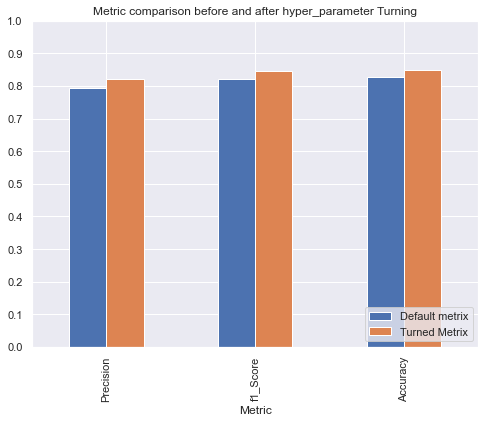

In [42]:
plt.rcParams['figure.figsize'] = [8,6]

metricz.plot.bar(x='Metric',grid=True )
ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
plt.legend(loc=4)  
plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.title('Metric comparison before and after hyper_parameter Turning')
plt.show()

## Logistic Legression model

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

In [73]:
Logistic_model = LogisticRegression()

# Fit Logistic_model to the train set
Logistic_model.fit(X_train,y_train)

# Use Logistic_model to predict instances from the test set and store it
y_pred = Logistic_model.predict(X_test)
accuracy_default=Logistic_model.score(X_test, y_test)
print("The Accuracy: ", accuracy_default)

The Accuracy:  0.8530805687203792


In [62]:
# Define the grid of values for tol and max_iter
tol = [1.0,0.01, 0.001, 0.0001,10,100]
max_iter = [2,5,10,50,100, 150, 200,500]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [68]:

model_grid = GridSearchCV(estimator=Logistic_model, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = model_grid.fit(rescaledX, y)

# Summarize results
best_score = grid_model_result.best_score_
best_params = grid_model_result.best_params_
print(f"Accuracy after turning:{best_score}")

Accuracy after turning:0.8542445866141731


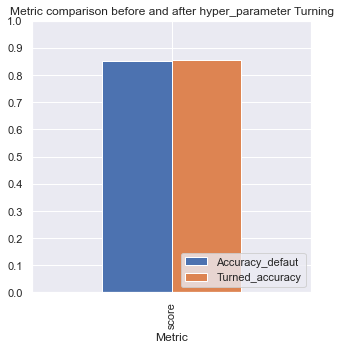

In [91]:
metric=pd.DataFrame({'Metric':['score']})
metric['Accuracy_defaut']=accuracy_default
metric['Turned_accuracy']=best_score

plt.rcParams['figure.figsize'] = [5,5]

metric.plot.bar(x='Metric',grid=True )
ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
plt.legend(loc=4)  
plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.title('Metric comparison before and after hyper_parameter Turning')
plt.show()